In [ ]:
train_data_dir='/content/drive/MyDrive/SplitImages/train'
validation_data_dir='/content/drive/MyDrive/SplitImages/validation'

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG19 model with pre-trained weights and discard the top (fully connected) layers
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(375, 375, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
output_multiclass = Dense(3, activation='softmax')(x)

# Create the model
model_multiclass = Model(inputs=base_model.input, outputs=output_multiclass)

# Print the model summary
model_multiclass.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 375, 375, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 375, 375, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 375, 375, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 187, 187, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 187, 187, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 187, 187, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 93, 93, 128)       0   

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=0, min_delta=0.002, mode='auto', baseline=None, restore_best_weights=True)

In [ ]:
batch_size_train = 80
batch_size_val = 28
batch_size_test = 16
epochs = 1500

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation (without data augmentation)
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for training
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(375, 375),
    batch_size=batch_size_train,
    class_mode='categorical'  # Assumes categorical labels
)

# Flow validation images in batches
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(375, 375),
    batch_size=batch_size_val,
    class_mode='categorical'  # Assumes categorical labels
)

# Compile the model (same as before)
model_multiclass.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model_multiclass.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size_train,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size_val,
    callbacks=[callback]
)


Found 800 images belonging to 3 classes.
Found 274 images belonging to 3 classes.
Epoch 1/1500
10/10 [==============================] - 2433s 251s/step - loss: 8.0254 - accuracy: 0.3988 - val_loss: 2.7384 - val_accuracy: 0.2698
Epoch 2/1500
10/10 [==============================] - 2432s 250s/step - loss: 1.4698 - accuracy: 0.5250 - val_loss: 0.5803 - val_accuracy: 0.7698
Epoch 3/1500
10/10 [==============================] - 2431s 250s/step - loss: 0.6511 - accuracy: 0.7000 - val_loss: 0.4380 - val_accuracy: 0.8492
Epoch 4/1500
10/10 [==============================] - 2400s 247s/step - loss: 0.5549 - accuracy: 0.7837 - val_loss: 0.4029 - val_accuracy: 0.8611
Epoch 5/1500
10/10 [==============================] - 2345s 241s/step - loss: 0.4291 - accuracy: 0.8313 - val_loss: 0.3491 - val_accuracy: 0.8770
Epoch 6/1500
10/10 [==============================] - 2408s 247s/step - loss: 0.3904 - accuracy: 0.8462 - val_loss: 0.3694 - val_accuracy: 0.8690


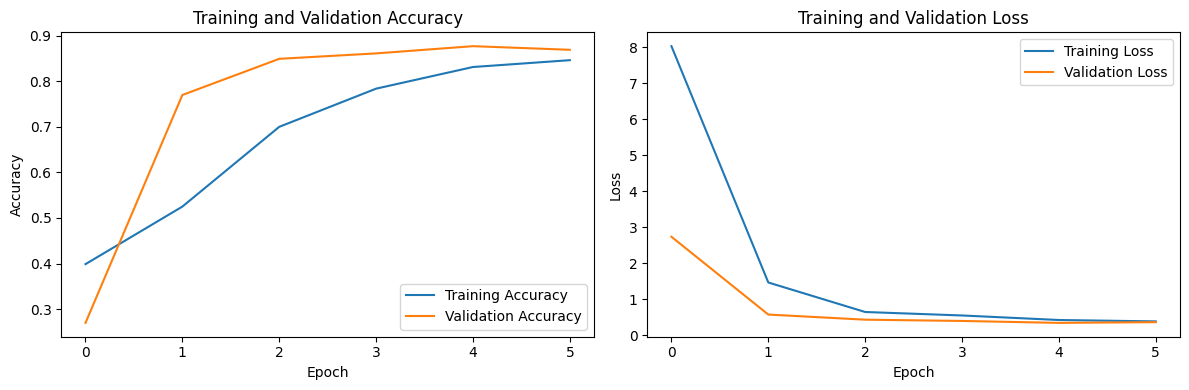

In [ ]:
import matplotlib.pyplot as plt

# Access training and validation accuracy and loss values from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create plots for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Create plots for loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Layer Index: 1, Layer Name: block1_conv1
Layer Index: 2, Layer Name: block1_conv2
Layer Index: 4, Layer Name: block2_conv1
Layer Index: 5, Layer Name: block2_conv2
Layer Index: 7, Layer Name: block3_conv1
Layer Index: 8, Layer Name: block3_conv2
Layer Index: 9, Layer Name: block3_conv3
Layer Index: 10, Layer Name: block3_conv4
Layer Index: 12, Layer Name: block4_conv1
Layer Index: 13, Layer Name: block4_conv2
Layer Index: 14, Layer Name: block4_conv3
Layer Index: 15, Layer Name: block4_conv4
Layer Index: 17, Layer Name: block5_conv1
Layer Index: 18, Layer Name: block5_conv2
Layer Index: 19, Layer Name: block5_conv3
Layer Index: 20, Layer Name: block5_conv4


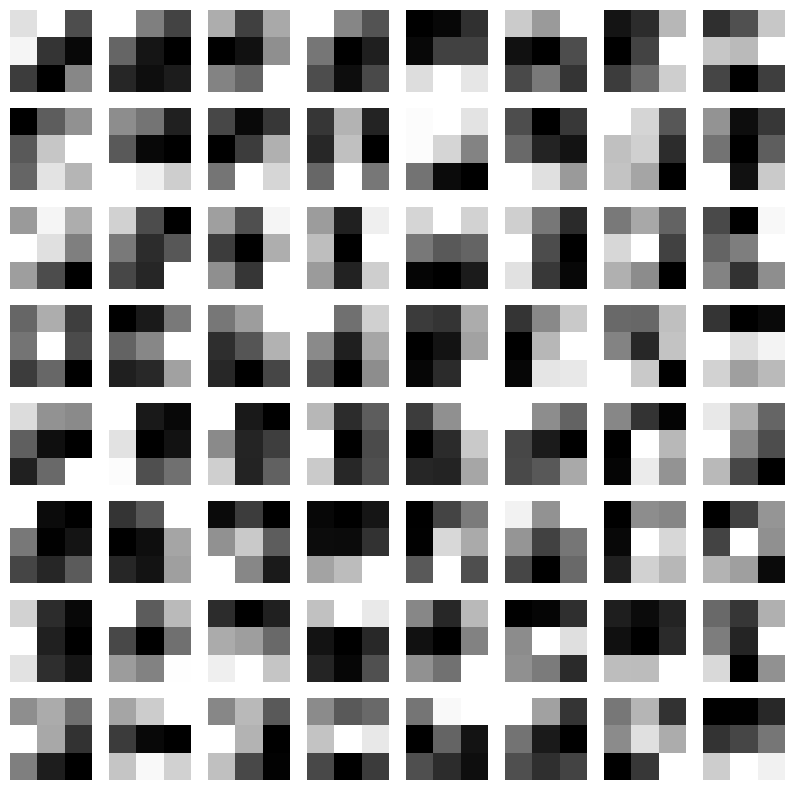

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Get the list of layers in your model
model_layers = model_multiclass.layers

# Print the index and name of each layer to identify the convolutional layer
for index, layer in enumerate(model_layers):
    if 'conv' in layer.name:  # You can adjust this condition to identify the convolutional layers
        print(f"Layer Index: {index}, Layer Name: {layer.name}")

# Replace index_of_conv_layer with the actual index of the convolutional layer you want to visualize
index_of_conv_layer = 2  # Replace with the correct index

# Choose a convolutional layer to visualize
conv_layer = model_multiclass.layers[index_of_conv_layer]

# Get the learned filters (kernels) for that layer
filters, biases = conv_layer.get_weights()

# Normalize the filters for visualization
normalized_filters = (filters - filters.min()) / (filters.max() - filters.min())

# Visualize the filters
number_of_filters = filters.shape[3]
sqrt_number_of_filters = int(number_of_filters**0.5)

plt.figure(figsize=(10, 10))
for i in range(number_of_filters):
    plt.subplot(sqrt_number_of_filters, sqrt_number_of_filters, i+1)
    plt.imshow(normalized_filters[:, :, 0, i], cmap='gray')  # Visualize only one channel of the filter
    plt.axis('off')
plt.show()


1/1 [==============================] - 19s 19s/step


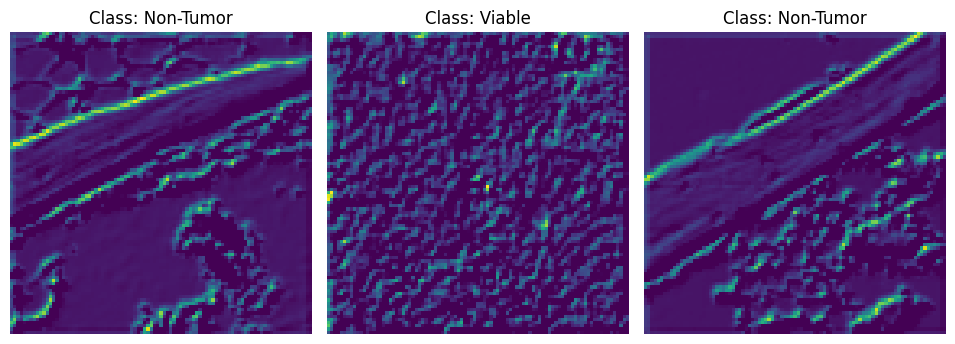

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Define class names based on class indices
class_names = sorted(validation_generator.class_indices, key=lambda x: validation_generator.class_indices[x])

# Choose the layer to visualize (Dense layer with 1024 neurons)
layer_to_visualize = model_multiclass.layers[7]  # Assuming this is the index of the Dense layer

# Create a sub-model that outputs the activations of the chosen layer
activation_model = Model(inputs=model_multiclass.input, outputs=layer_to_visualize.output)

# Get activations for the chosen layer for a batch of images
num_samples = len(class_names)  # Number of different samples to visualize
num_neurons_to_visualize = 50

plt.figure(figsize=(16, 16 * num_samples))

for class_idx in range(num_samples):
    # Get a batch of images and labels from the validation generator for the current class
    sample_batch, sample_labels = validation_generator.next()
    activations = activation_model.predict(sample_batch)

    plt.subplot(num_samples, num_neurons_to_visualize // 10, class_idx + 1)

    for i in range(num_neurons_to_visualize):
        plt.imshow(activations[0, ..., i], cmap='viridis')
        plt.title(f"Class: {class_names[np.argmax(sample_labels[0])]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 29s 29s/step


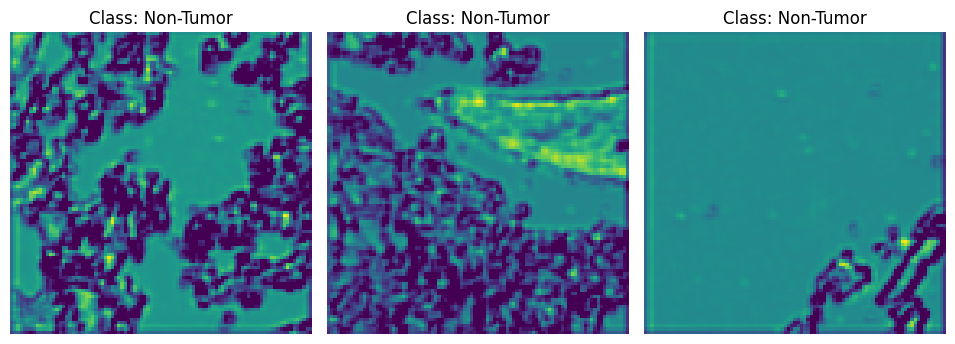

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Define class names based on class indices
class_names = sorted(validation_generator.class_indices, key=lambda x: validation_generator.class_indices[x])

# Choose the layer to visualize (Dense layer with 1024 neurons)
layer_to_visualize = model_multiclass.layers[8]  # Assuming this is the index of the Dense layer

# Create a sub-model that outputs the activations of the chosen layer
activation_model = Model(inputs=model_multiclass.input, outputs=layer_to_visualize.output)

# Get activations for the chosen layer for a batch of images
num_samples = len(class_names)  # Number of different samples to visualize
num_neurons_to_visualize = 50

plt.figure(figsize=(16, 16 * num_samples))

for class_idx in range(num_samples):
    # Get a batch of images and labels from the validation generator for the current class
    sample_batch, sample_labels = validation_generator.next()
    activations = activation_model.predict(sample_batch)

    plt.subplot(num_samples, num_neurons_to_visualize // 10, class_idx + 1)

    for i in range(num_neurons_to_visualize):
        plt.imshow(activations[0, ..., i], cmap='viridis')
        plt.title(f"Class: {class_names[np.argmax(sample_labels[0])]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 65s 65s/step


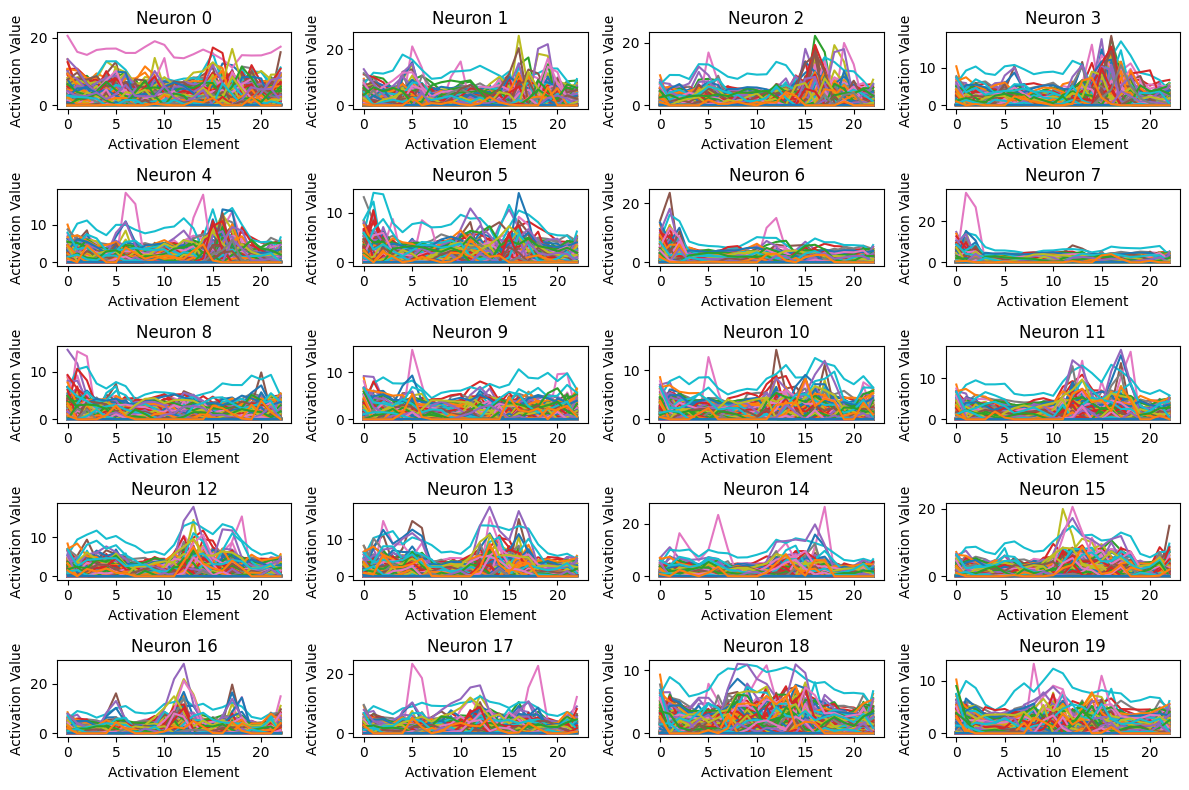

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code)

# Get the activations of the first dense layer
dense_layer_index = 17  # Index of the first dense layer
dense_layer = model_multiclass.layers[dense_layer_index]

# Create a sub-model to get activations of the first dense layer
activation_model = Model(inputs=model_multiclass.input, outputs=dense_layer.output)

# Get a batch of images and labels from the validation generator
sample_batch, sample_labels = validation_generator.next()

# Get the activations of the first dense layer for the batch of images
activations = activation_model.predict(sample_batch)

# Get the number of neurons in the first dense layer
number_of_neurons = activations.shape[1]

# Plot the activations for each neuron across the batch
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(5, 4, i + 1)  # Creating a grid for neurons
    plt.plot(activations[0, :, i])  # Plot activations for the first image in the batch
    plt.title(f"Neuron {i}")
    plt.xlabel("Activation Element")
    plt.ylabel("Activation Value")
plt.tight_layout()
plt.show()


1/1 [==============================] - 2s 2s/step


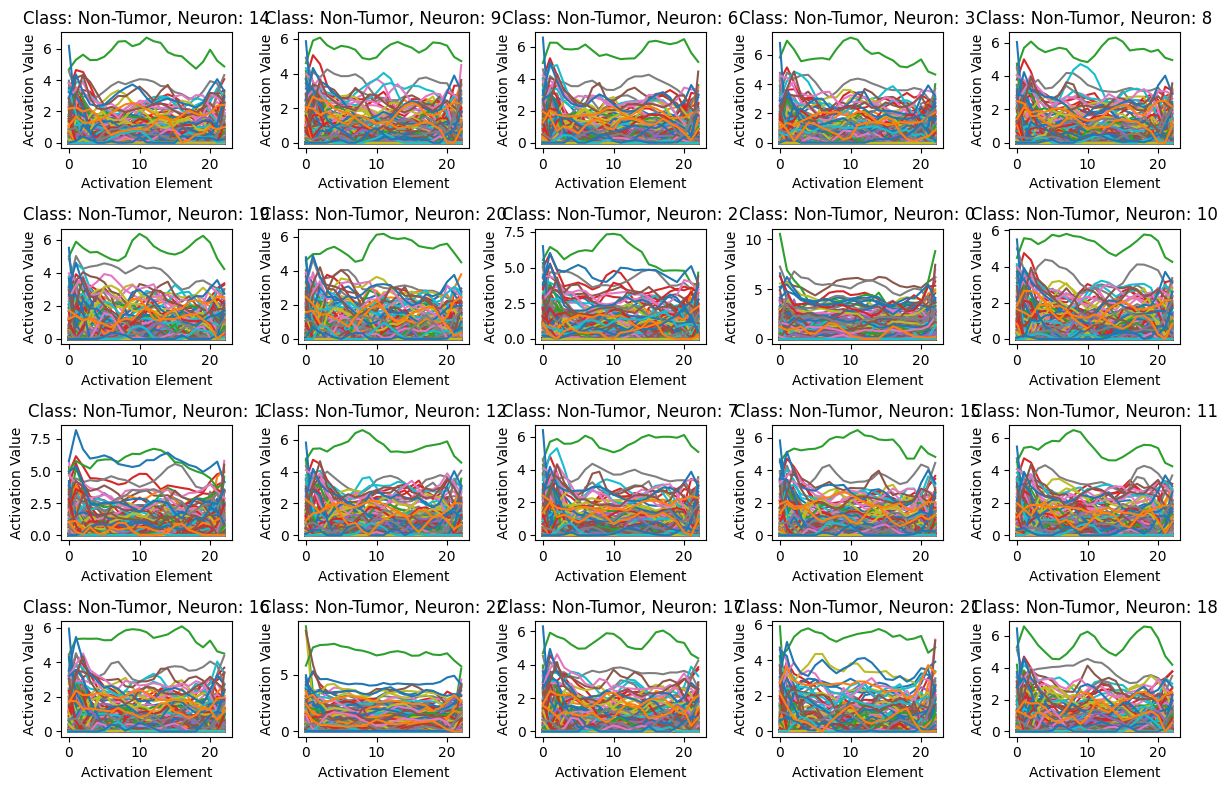

1/1 [==============================] - 3s 3s/step


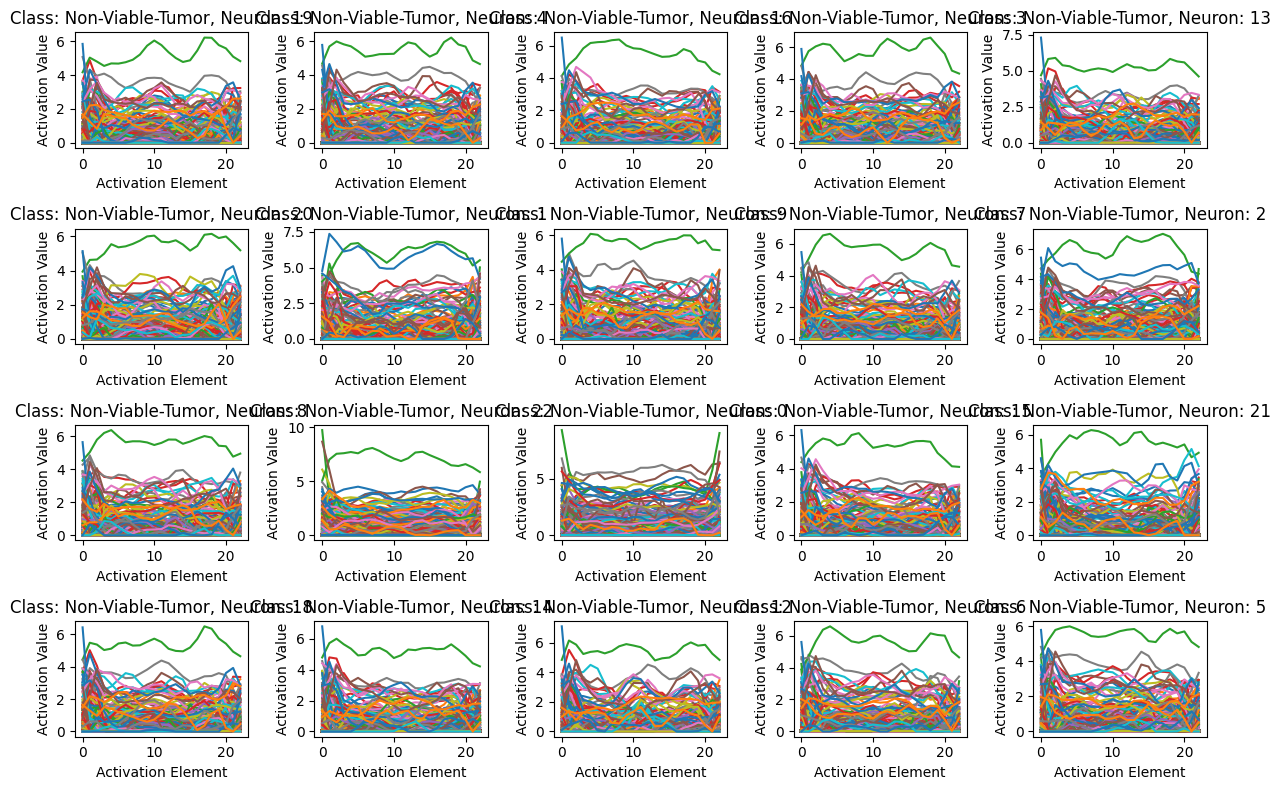

1/1 [==============================] - 3s 3s/step


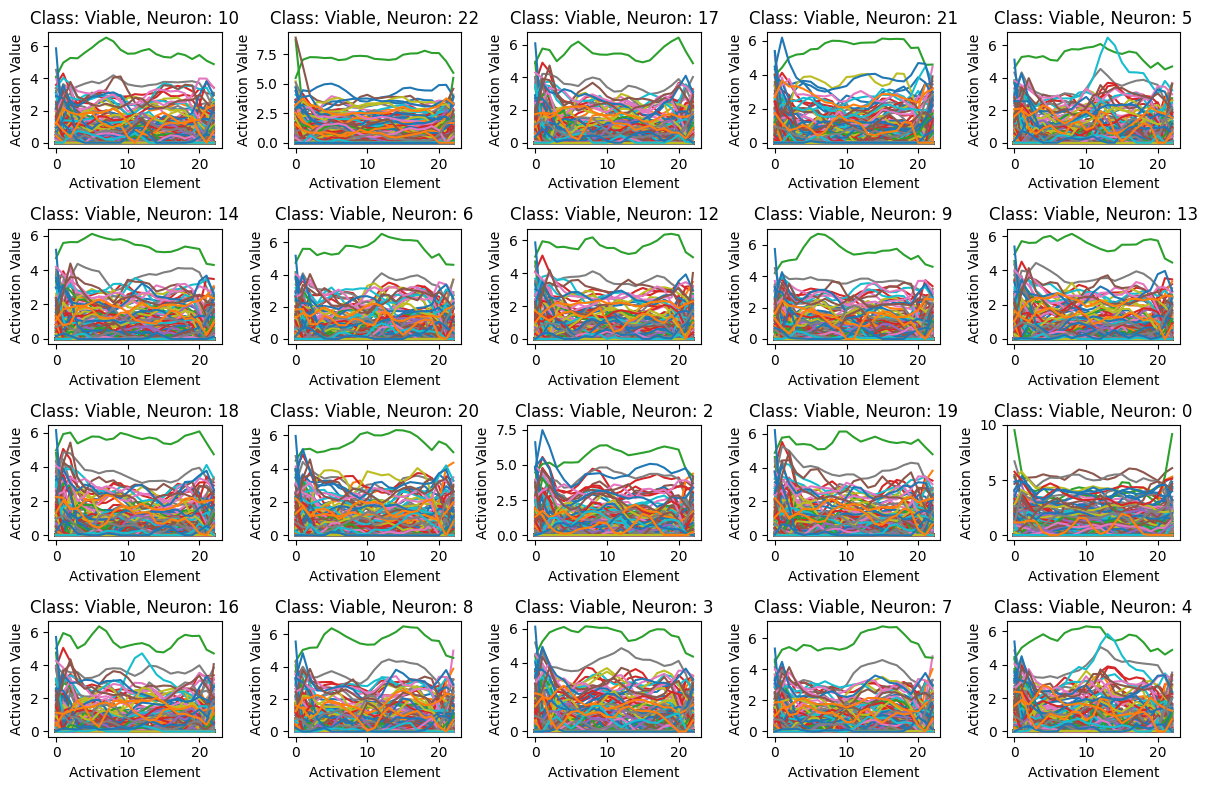

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# ... (previous code, excluding model creation and training)

# Load your pre-trained model here (model_multiclass)

# Create a sub-model to get activations of the first dense layer
dense_layer_index = 18  # Index of the first dense layer in your model
dense_layer = model_multiclass.layers[dense_layer_index]
activation_model = Model(inputs=model_multiclass.input, outputs=dense_layer.output)

# Directory containing your training data
train_data_dir = '/content/drive/MyDrive/SplitImages/train'

# Extract class names from the subdirectories of train_data_dir
class_names = sorted(os.listdir(train_data_dir))

# Choose the number of neurons to visualize
num_neurons_to_visualize = 20

# Loop through each class and visualize activations for random neurons
for class_index, class_name in enumerate(class_names):
    # Load or generate an image from the current class
    # Replace this with your image loading or generation code
    class_image = np.random.random((1, 375, 375, 3))  # Replace with actual data

    # Get activations for the current class image
    class_activations = activation_model.predict(class_image)

    # Choose random neurons for visualization
    random_neuron_indices = np.random.choice(class_activations.shape[1], num_neurons_to_visualize, replace=False)

    # Visualize activations for the selected neurons
    plt.figure(figsize=(12, 8))
    for i, neuron_index in enumerate(random_neuron_indices):
        plt.subplot(4, 5, i + 1)  # Creating a 4x5 grid for 20 neurons
        plt.plot(class_activations[0, neuron_index])
        plt.title(f"Class: {class_name}, Neuron: {neuron_index}")
        plt.xlabel("Activation Element")
        plt.ylabel("Activation Value")
    plt.tight_layout()
    plt.show()


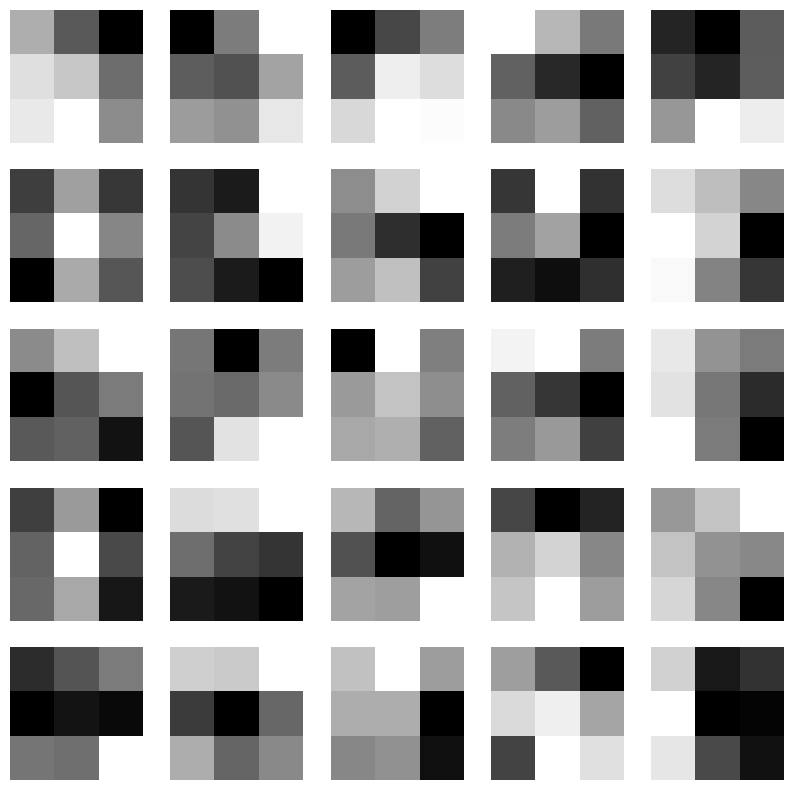

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

# Load the VGG19 model with pre-trained weights
base_model =model_multiclass

# Choose a convolutional layer to visualize
layer_index = 15  # Index of the convolutional layer you want to visualize
conv_layer = base_model.layers[layer_index]

# Get the learned filters (kernels) for that layer
filters, _ = conv_layer.get_weights()

# Normalize the filters for visualization
normalized_filters = (filters - filters.min()) / (filters.max() - filters.min())

# Visualize the filters
number_of_filters = filters.shape[3]
max_filters_to_visualize = 25  # Limit the number of filters to visualize
sqrt_max_filters_to_visualize = int(max_filters_to_visualize**0.5)

plt.figure(figsize=(10, 10))
for i in range(max_filters_to_visualize):
    plt.subplot(sqrt_max_filters_to_visualize, sqrt_max_filters_to_visualize, i + 1)
    plt.imshow(normalized_filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()


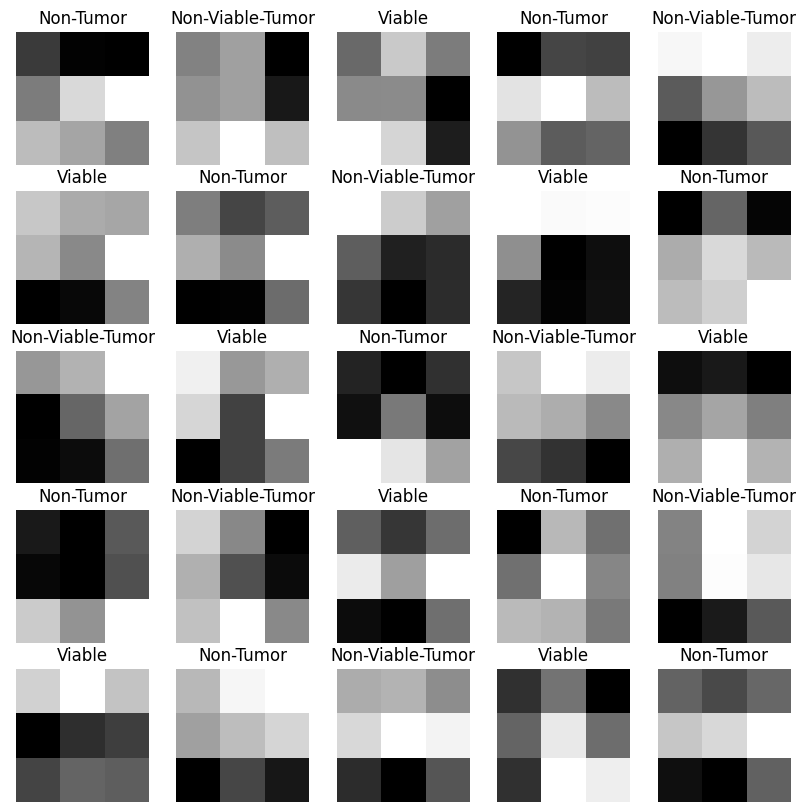

In [ ]:
import os

# Load class names from the directory structure
class_names = os.listdir('/content/drive/MyDrive/SplitImages/test')

# Assuming you have already loaded your model (model_multiclass)
last_conv_layer = model_multiclass.get_layer('block5_conv4')
filters, _ = last_conv_layer.get_weights()
normalized_filters = (filters - filters.min()) / (filters.max() - filters.min())

# Simulate mapping filters to class names (this is a simplified example)
def map_filter_to_class_name(filter_index):
    # In this example, we're mapping filters to class names sequentially
    return class_names[filter_index % len(class_names)]

plt.figure(figsize=(10, 10))
for i in range(max_filters_to_visualize):
    plt.subplot(sqrt_max_filters_to_visualize, sqrt_max_filters_to_visualize, i + 1)
    plt.imshow(normalized_filters[:, :, 0, i], cmap='gray')
    plt.title(map_filter_to_class_name(i))
    plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step


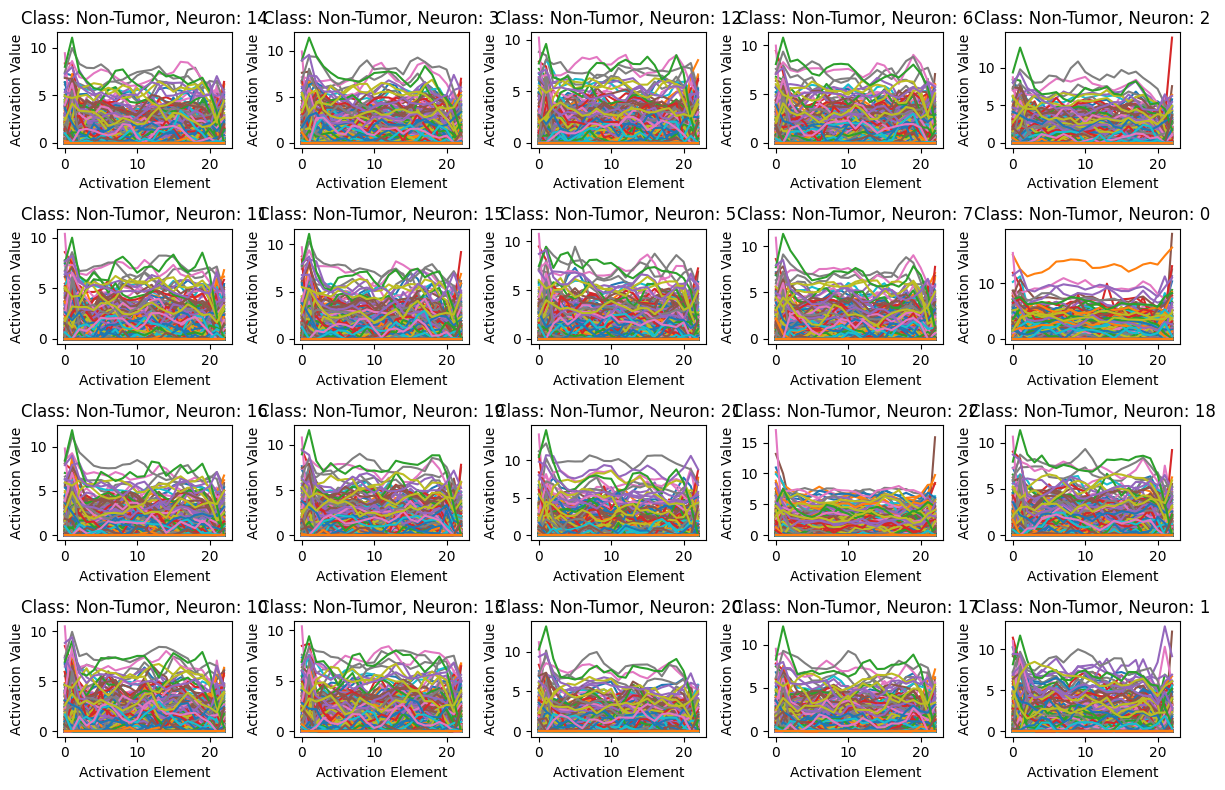

1/1 [==============================] - 2s 2s/step


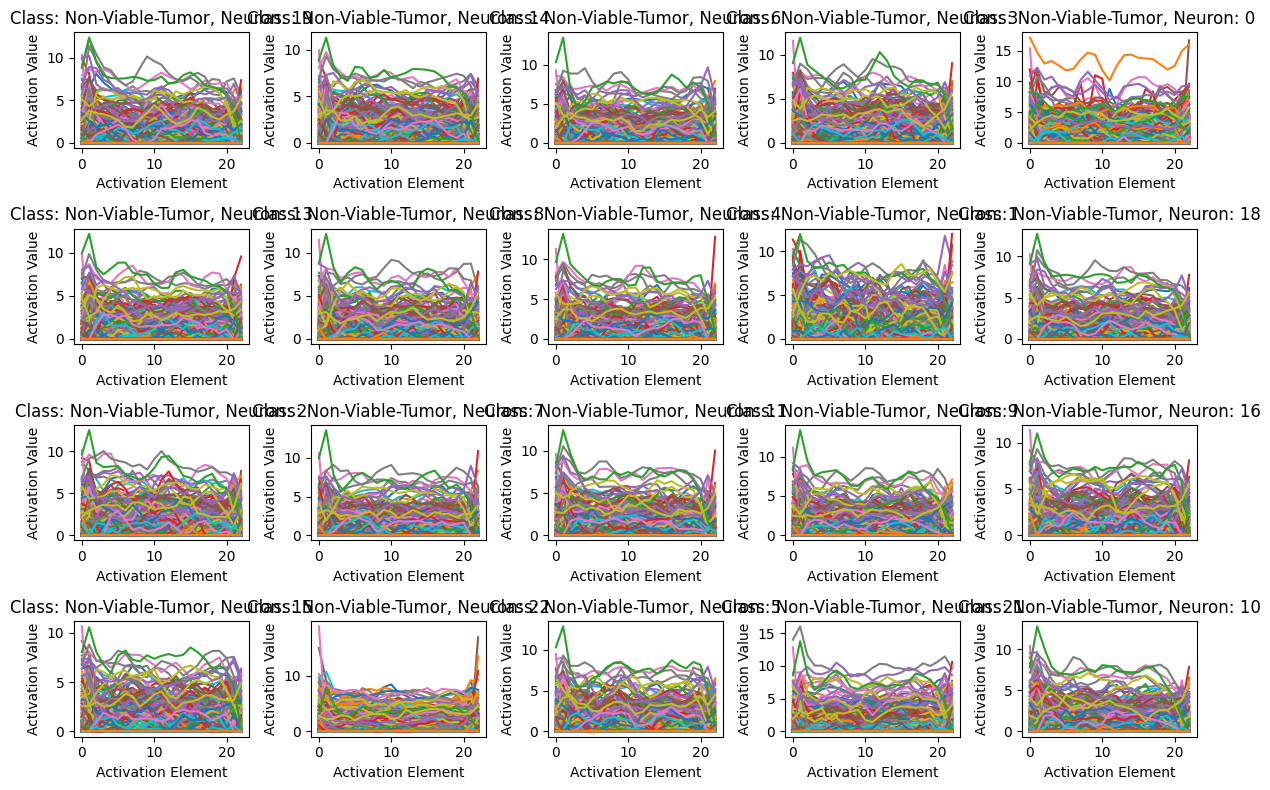

1/1 [==============================] - 2s 2s/step


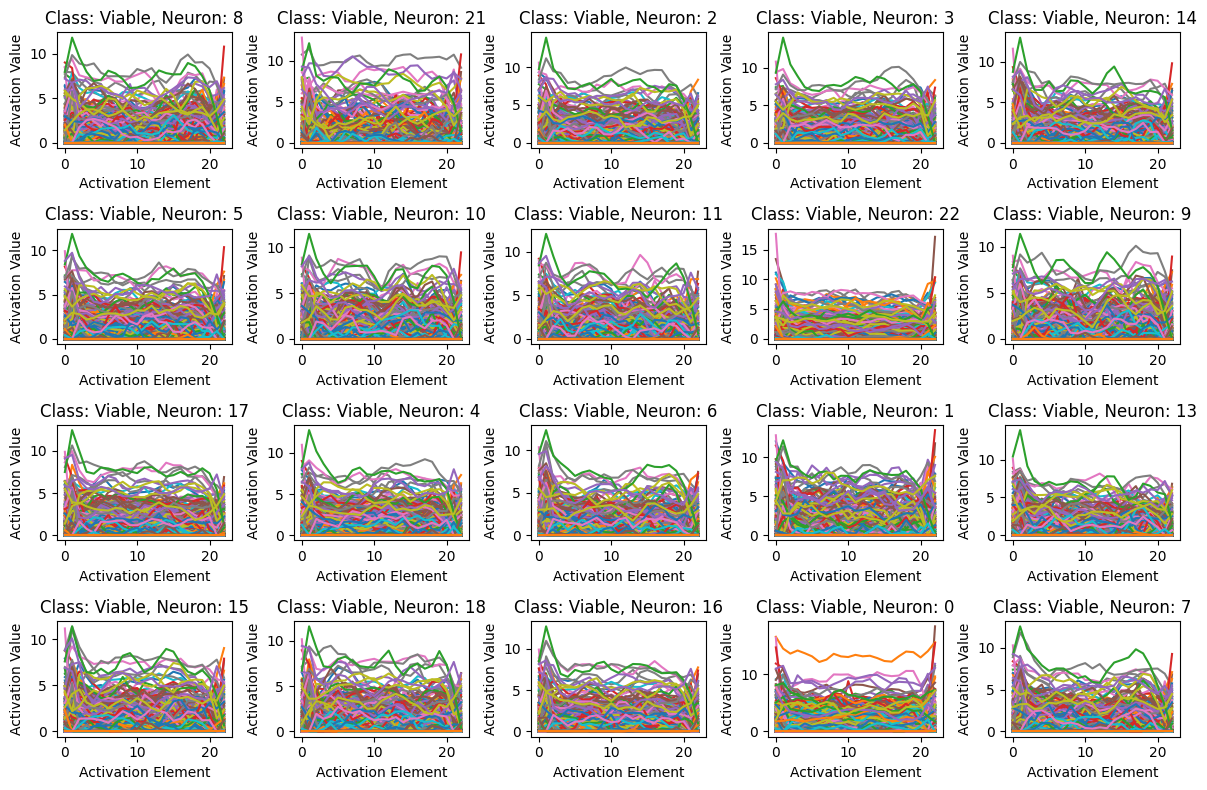

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# ... (previous code, excluding model creation and training)

# Load your pre-trained model here (model_multiclass)

# Create a sub-model to get activations of the first dense layer
dense_layer_index = 17  # Index of the first dense layer in your model
dense_layer = model_multiclass.layers[dense_layer_index]
activation_model = Model(inputs=model_multiclass.input, outputs=dense_layer.output)

# Directory containing your training data
train_data_dir = '/content/drive/MyDrive/SplitImages/train'

# Extract class names from the subdirectories of train_data_dir
class_names = sorted(os.listdir(train_data_dir))

# Choose the number of neurons to visualize
num_neurons_to_visualize = 20

# Loop through each class and visualize activations for random neurons
for class_index, class_name in enumerate(class_names):
    # Load or generate an image from the current class
    # Replace this with your image loading or generation code
    class_image = np.random.random((1, 375, 375, 3))  # Replace with actual data

    # Get activations for the current class image
    class_activations = activation_model.predict(class_image)

    # Choose random neurons for visualization
    random_neuron_indices = np.random.choice(class_activations.shape[1], num_neurons_to_visualize, replace=False)

    # Visualize activations for the selected neurons
    plt.figure(figsize=(12, 8))
    for i, neuron_index in enumerate(random_neuron_indices):
        plt.subplot(4, 5, i + 1)  # Creating a 4x5 grid for 20 neurons
        plt.plot(class_activations[0, neuron_index])
        plt.title(f"Class: {class_name}, Neuron: {neuron_index}")
        plt.xlabel("Activation Element")
        plt.ylabel("Activation Value")
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 2s 2s/step


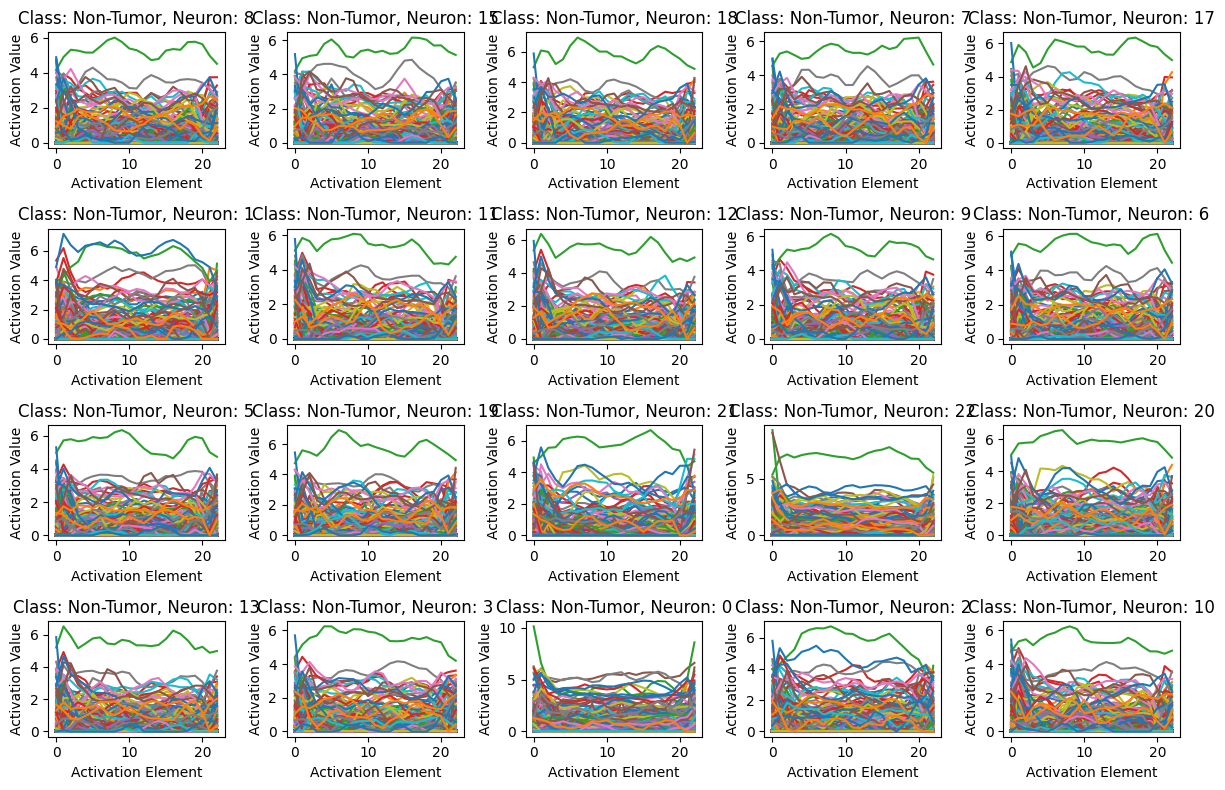

1/1 [==============================] - 2s 2s/step


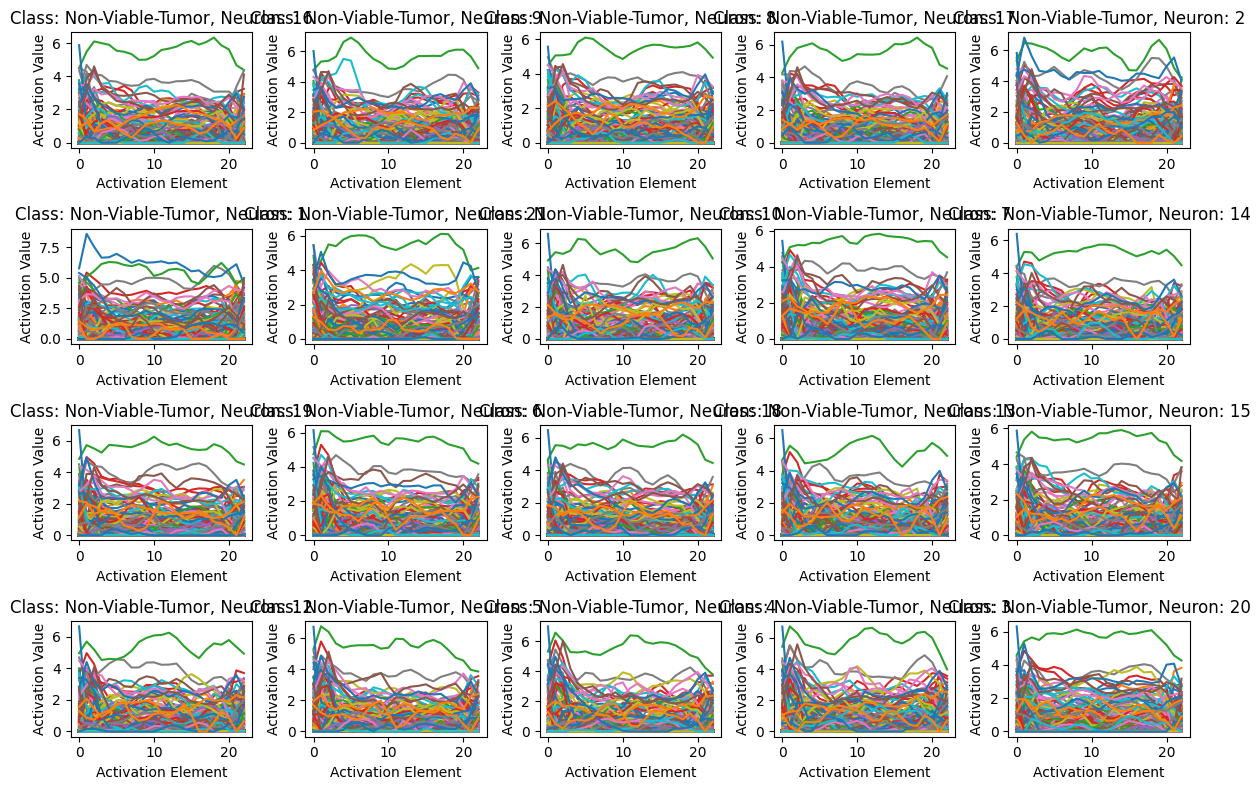

1/1 [==============================] - 2s 2s/step


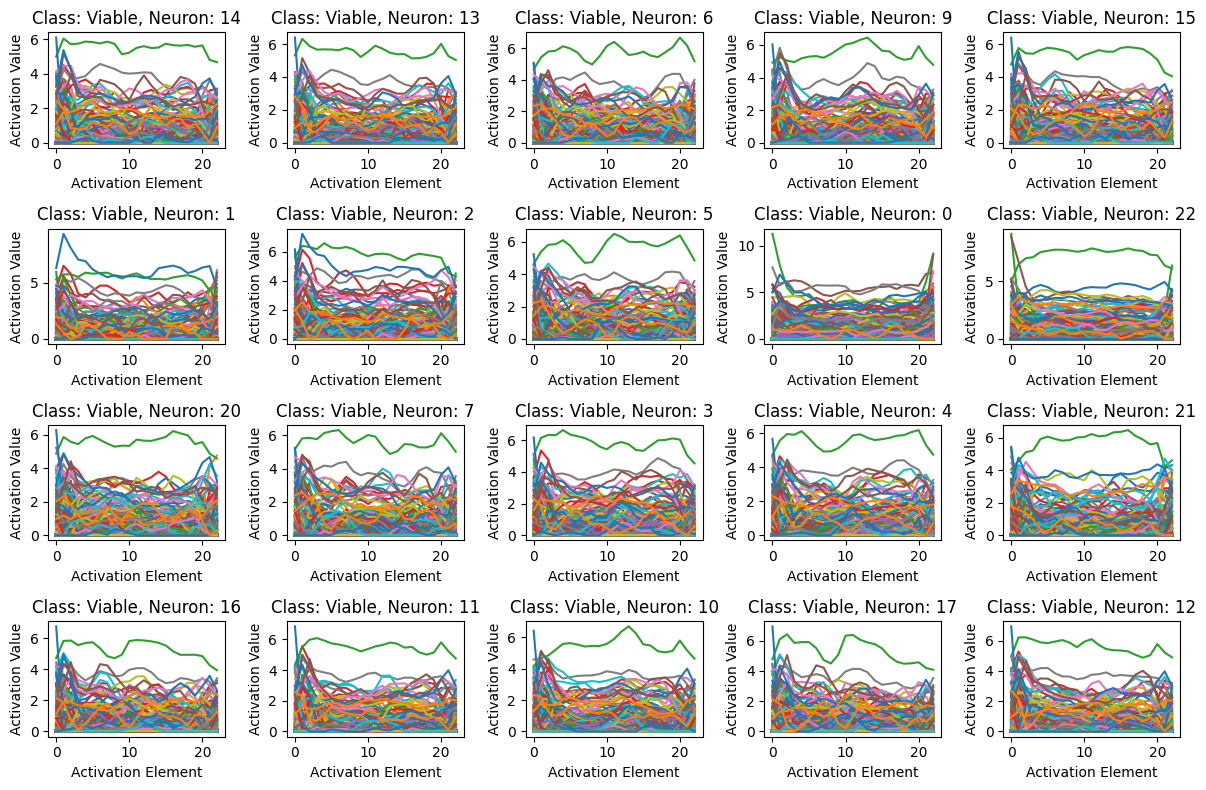

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# ... (previous code, excluding model creation and training)

# Load your pre-trained model here (model_multiclass)

# Create a sub-model to get activations of the first dense layer
dense_layer_index = 18  # Index of the first dense layer in your model
dense_layer = model_multiclass.layers[dense_layer_index]
activation_model = Model(inputs=model_multiclass.input, outputs=dense_layer.output)

# Directory containing your training data
train_data_dir = '/content/drive/MyDrive/SplitImages/train'

# Extract class names from the subdirectories of train_data_dir
class_names = sorted(os.listdir(train_data_dir))

# Choose the number of neurons to visualize
num_neurons_to_visualize = 20

# Loop through each class and visualize activations for random neurons
for class_index, class_name in enumerate(class_names):
    # Load or generate an image from the current class
    # Replace this with your image loading or generation code
    class_image = np.random.random((1, 375, 375, 3))  # Replace with actual data

    # Get activations for the current class image
    class_activations = activation_model.predict(class_image)

    # Choose random neurons for visualization
    random_neuron_indices = np.random.choice(class_activations.shape[1], num_neurons_to_visualize, replace=False)

    # Visualize activations for the selected neurons
    plt.figure(figsize=(12, 8))
    for i, neuron_index in enumerate(random_neuron_indices):
        plt.subplot(4, 5, i + 1)  # Creating a 4x5 grid for 20 neurons
        plt.plot(class_activations[0, neuron_index])
        plt.title(f"Class: {class_name}, Neuron: {neuron_index}")
        plt.xlabel("Activation Element")
        plt.ylabel("Activation Value")
    plt.tight_layout()
    plt.show()


In [ ]:
print(model_multiclass.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 375, 375, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 375, 375, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 375, 375, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 187, 187, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 187, 187, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 187, 187, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 93, 93, 128)       0   

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
trained_model =model_multiclass # Replace with the actual path

# Define the test data directory
test_data_dir = '/content/drive/MyDrive/SplitImages/test'

# Create a data generator for test images
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for testing
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(375, 375),
    batch_size=batch_size_test,  # Set an appropriate batch size
    class_mode='categorical',   # Assumes categorical labels
    shuffle=False                # Don't shuffle test data
)

# Predict the classes for test images using the trained model
predictions = trained_model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

# Get the true class labels from the generator
true_labels = test_generator.classes

# Calculate accuracy
accuracy = sum(predicted_labels == true_labels) / len(true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 70 images belonging to 3 classes.
5/5 [==============================] - 154s 29s/step
Test Accuracy: 88.57%
